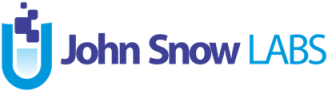

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/misc/Loading_Data_with_Custom_Columns.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering and Summarization tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation, toxicity and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[openai,transformers,evaluate]"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [5]:
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>



| Parameter     | Description |
| - | - |
| **task**      | Task for which the model is to be evaluated (text-classification or ner) |
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |


<br/>
<br/>

## Custom Column Names for CSV

The `data` parameter also accepts a dictionary that includes the following attributes:

```python
{
   "data_source": "",
   "feature_column": "",
   "target_column": "",
}

```
<br/>


| Key  | Description |
| - | - |
|**data_source**     |Represents the name of the dataset being used.|
|**feature_column**       |Specifies the column that contains the input features.
|**target_column**     |Represents the column that contains the target labels or categories.


<br/>
<br/>

# Text-Classification

In [6]:
# Load a sample.conll
!wget https://raw.githubusercontent.com/JohnSnowLabs/langtest/main/demo/data/imdb.csv

--2023-08-18 11:02:32--  https://raw.githubusercontent.com/JohnSnowLabs/langtest/main/demo/data/imdb.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28937856 (28M) [text/plain]
Saving to: ‘imdb.csv’

imdb.csv            100%[===================>]  27.60M  --.-KB/s    in 0.08s   

2023-08-18 11:02:33 (365 MB/s) - ‘imdb.csv’ saved [28937856/28937856]



### Setup and Configure Harness

In [7]:
harness = Harness(task="text-classification",
                  model={"model":"lvwerra/distilbert-imdb", "hub":"huggingface"},
                  data={"data_source": "imdb.csv",
                        "feature_column": "Sentence",
                        "target_column": 'class',
                       })

2023-08-18 11:02:36.886091: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "american_to_british": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "min_micro_f1_score": {
    "min_score": 0.7
   }
  },
  "bias": {
   "replace_to_female_pronouns": {
    "min_pass_rate": 0.7
   },
   "replace_to_low_income_country": {
    "min_pass_rate": 0.7
   }
  },
  "fairness": {
   "min_gender_f1_score": {
    "min_score": 0.6
   }
  },
  "representation": {
   "min_label_representation_count": {
    "min_count": 50
   }
  }
 }
}


In [8]:
harness.configure({
    "tests":{
        "defaults":{"min_pass_rate":0.5},
        "accuracy":{
            "min_macro_f1_score":{"min_score":0.7},
        },
        "robustness":{
            "add_typo":{"min_pass_rate":0.7},
            "lowercase":{"min_pass_rate":0.7},
        },
        "bias":{
            "replace_to_female_pronouns":{"min_pass_rate":0.7},
        }
    }
})

{'tests': {'defaults': {'min_pass_rate': 0.5},
  'accuracy': {'min_macro_f1_score': {'min_score': 0.7}},
  'robustness': {'add_typo': {'min_pass_rate': 0.7},
   'lowercase': {'min_pass_rate': 0.7}},
  'bias': {'replace_to_female_pronouns': {'min_pass_rate': 0.7}}}}

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'uppercase': {'min_pass_rate': 0.66, 'prob': 0.50}, 
        'dyslexia_word_swap':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```

In [10]:
harness.data=harness.data[:1000]

### Generating the test cases.

In [11]:
harness.generate()

Generating testcases...: 100%|██████████| 3/3 [00:00<00:00, 26159.90it/s]


In [12]:
harness.testcases()

,category,test_type,original,test_case
0,accuracy,min_macro_f1_score,-,macro
1,robustness,add_typo,One of the other reviewers has mentioned that ...,One of the other reviewers has mentioned that ...
2,robustness,add_typo,A wonderful little production. <br /><br />The...,A wonderful little production. <br /><br />The...
3,robustness,add_typo,I thought this was a wonderful way to spend ti...,I thought this was a wonderful way to spend ti...
4,robustness,add_typo,Basically there's a family where a little boy ...,Basically there's a family where s little boy ...
...,...,...,...,...
2996,bias,replace_to_female_pronouns,Nothing is sacred. Just ask Ernie Fosselius. T...,Nothing is sacred. Just ask Ernie Fosselius. T...
2997,bias,replace_to_female_pronouns,I hated it. I hate self-aware pretentious inan...,I hated it. I hate self-aware pretentious inan...
2998,bias,replace_to_female_pronouns,I usually try to be professional and construct...,I usually try to be professional and construct...
2999,bias,replace_to_female_pronouns,If you like me is going to see this in a film ...,If you like me is going to see this in a film ...


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [13]:
harness.run()

Running testcases... :   0%|          | 0/3001 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2389: FutureWarning: The `truncation_strategy` argument is deprecated and will be removed in a future version, use `truncation=True` to truncate examples to a max length. You can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to truncate to the maximal input size of the model (e.g. 512 for Bert).  If you have pairs of inputs, you can give a specific truncation strategy selected among `truncation='only_first'` (will only truncate the first sentence in the pairs) `truncation='only_second'` (will only truncate the second sentence in the pairs) or `truncation='longest_first'` (will iteratively remove tokens from the longest sentence in the pairs).
  warnings.warn(
Running testcases... : 100%|██████████| 3001/3001 [06:07<00:00,  8.17it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [15]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,pass
0,accuracy,min_macro_f1_score,-,macro,0.7,0.0,False
1,robustness,add_typo,One of the other reviewers has mentioned that ...,One of the other reviewers has mentioned that ...,POSITIVE,POSITIVE,True
2,robustness,add_typo,A wonderful little production. <br /><br />The...,A wonderful little production. <br /><br />The...,POSITIVE,POSITIVE,True
3,robustness,add_typo,I thought this was a wonderful way to spend ti...,I thought this was a wonderful way to spend ti...,POSITIVE,POSITIVE,True
4,robustness,add_typo,Basically there's a family where a little boy ...,Basically there's a family where s little boy ...,NEGATIVE,NEGATIVE,True
...,...,...,...,...,...,...,...
2996,bias,replace_to_female_pronouns,Nothing is sacred. Just ask Ernie Fosselius. T...,Nothing is sacred. Just ask Ernie Fosselius. T...,POSITIVE,POSITIVE,True
2997,bias,replace_to_female_pronouns,I hated it. I hate self-aware pretentious inan...,I hated it. I hate self-aware pretentious inan...,NEGATIVE,NEGATIVE,True
2998,bias,replace_to_female_pronouns,I usually try to be professional and construct...,I usually try to be professional and construct...,NEGATIVE,NEGATIVE,True
2999,bias,replace_to_female_pronouns,If you like me is going to see this in a film ...,If you like me is going to see this in a film ...,NEGATIVE,NEGATIVE,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [16]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,accuracy,min_macro_f1_score,1,0,0%,50%,False
1,robustness,add_typo,9,991,99%,70%,True
2,robustness,lowercase,0,1000,100%,70%,True
3,bias,replace_to_female_pronouns,1,999,100%,70%,True


# NER

In [17]:
# Load a sample.conll
!wget https://raw.githubusercontent.com/JohnSnowLabs/langtest/main/tests/fixtures/tner.csv

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
--2023-08-18 11:11:03--  https://raw.githubusercontent.com/JohnSnowLabs/langtest/main/tests/fixtures/tner.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32782 (32K) [text/plain]
Saving to: ‘tner.csv’

tner.csv            100%[===================>]  32.01K  --.-KB/s    in 0s      

2023-08-18 11:11:04 (91.0 MB/s) - ‘tner.csv’ saved [32782/32782]



### Setup and Configure Harness

In [18]:
harness = Harness(
                  task="ner",
                  model={"model":"dslim/bert-base-NER", "hub":"huggingface"},
                  data={"data_source": "tner.csv",
                        "feature_column": "tokens",
                        "target_column": 'ner_tags',
                       })

Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "american_to_british": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "min_micro_f1_score": {
    "min_score": 0.7
   }
  },
  "bias": {
   "replace_to_female_pronouns": {
    "min_pass_rate": 0.7
   },
   "replace_to_low_income_country": {
    "min_pass_rate": 0.7
   }
  },
  "fairness": {
   "min_gender_f1_score": {
    "min_score": 0.6
   }
  },
  "representation": {
   "min_label_representation_count": {
    "min_count": 50
   }
  }
 }
}


### Generating the test cases.

In [19]:
harness.generate()

Generating testcases...: 100%|██████████| 5/5 [00:00<00:00, 22550.02it/s]


In [20]:
harness.testcases()

,category,test_type,original,test_case
0,robustness,add_typo,This division also contains the Ventana Wilder...,This division also contsins the Ventana Wilder...
1,robustness,add_typo,""" So here is the balance NBC has to consider :...",""" So here is the balance NBC has to consider :..."
2,robustness,add_typo,"It is a protest song that "" creates a cinemati...","It is a protest song that "" creates a cinemati..."
3,robustness,add_typo,This differs from approaches such as IP or Eth...,This differs from approaches such as IP or Eyh...
4,robustness,add_typo,"Since then , only Terry Bradshaw in 147 games ...","Since then , only Terry Bradshaw ia 147 games ..."
...,...,...,...,...
404,representation,min_label_representation_count,-,LOC
405,representation,min_label_representation_count,-,MISC
406,representation,min_label_representation_count,-,ORG
407,representation,min_label_representation_count,-,PER


### Running the tests

In [21]:
harness.run()

Running testcases... :   0%|          | 0/409 [00:00<?, ?it/s]

Running testcases... : 100%|██████████| 409/409 [00:29<00:00, 13.85it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [23]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,pass
0,robustness,add_typo,This division also contains the Ventana Wilder...,This division also contsins the Ventana Wilder...,"Ventana Wilderness: LOC, California: LOC","Ventana Wilderness: LOC, California: LOC",True
1,robustness,add_typo,""" So here is the balance NBC has to consider :...",""" So here is the balance NBC has to consider :...","NBC: ORG, The Who: MISC, Animal Practice: MISC","NBC: ORG, Xho: MISC, Animal Practice: MISC",False
2,robustness,add_typo,"It is a protest song that "" creates a cinemati...","It is a protest song that "" creates a cinemati...",America: LOC,America: LOC,True
3,robustness,add_typo,This differs from approaches such as IP or Eth...,This differs from approaches such as IP or Eyh...,"IP: MISC, Ethernet: MISC","IP: MISC, Eyhernet: MISC",True
4,robustness,add_typo,"Since then , only Terry Bradshaw in 147 games ...","Since then , only Terry Bradshaw ia 147 games ...","Terry Bradshaw: PER, Joe Montana: PER, Tom Bra...","Terry Bradshaw: PER, Joe Montana: PER, Tom Bra...",True
...,...,...,...,...,...,...,...
404,representation,min_label_representation_count,-,LOC,50.0,128.0,True
405,representation,min_label_representation_count,-,MISC,50.0,80.0,True
406,representation,min_label_representation_count,-,ORG,50.0,43.0,False
407,representation,min_label_representation_count,-,PER,50.0,51.0,True


### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [24]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,add_typo,10,90,90%,70%,True
1,robustness,american_to_british,2,98,98%,70%,True
2,accuracy,min_micro_f1_score,0,1,100%,100%,True
3,bias,replace_to_female_pronouns,0,100,100%,70%,True
4,bias,replace_to_low_income_country,2,98,98%,70%,True
5,fairness,min_gender_f1_score,0,3,100%,100%,True
6,representation,min_label_representation_count,1,4,80%,100%,False


# Question-Answering

#### OpenAI Model Testing For Question Answering

In this section, we dive into testing of OpenAI models in Question Answering task.

LangTest supports robustness tests for LLM testing for now.

In [ ]:
import os

os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

### Data : [Question Answering Dataset](https://www.kaggle.com/datasets/ananthu017/squad-csv-format)

### Setup and Configure Harness

In [17]:
harness = Harness(task="question-answering",
                  model={"model":"gpt-3.5-turbo-instruct","hub":"openai"},
                  data={"data_source":"SQuAD_csv.csv",
                  "feature_column":{"context": "context", "question": "question"},
                  "target_column":'answer_start',
                  })

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [18]:
harness.configure({
    "tests":{
        "defaults":{"min_pass_rate":0.5},
        "robustness":{
            "add_typo":{"min_pass_rate":0.7},
            "lowercase":{"min_pass_rate":0.7},
        }
    }
})

{'tests': {'defaults': {'min_pass_rate': 0.5},
  'robustness': {'add_typo': {'min_pass_rate': 0.7},
   'lowercase': {'min_pass_rate': 0.7}}}}

In [19]:
harness.data=harness.data[:20]

### Generating the test cases.

In [20]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 11335.96it/s]


In [21]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start brcoming popular?
1,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in when she was...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in whrn she was...
2,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beypnce leave Destiny's Child and bec...
3,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Beyonce grow up?,Beyoncé Giselle Knpwles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Feyonce grow up?
4,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In which decade did Beyonce become famous?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In wmich decade did Beyonce become famous?
5,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what R&B group was she the lead singer?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Ln what R&B group was she the lead singer?
6,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What album made her a worldwide known artist?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Whay album made her a worldwide known artist?
7,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Who managed the Destiny's Child group?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Who managed the Destiny's Fhild group?
8,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyoncé rise to fame?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Wnen did Beyoncé rise to fame?
9,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What role did Beyoncé have in Destiny's Child?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What role did Beyoncé have in Destinp's Child?


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [22]:
harness.run()

Running testcases... : 100%|██████████| 40/40 [00:54<00:00,  1.35s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [23]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start brcoming popular?,Beyoncé rose to fame in the late 1990s as the...,Beyoncé rose to fame in the late 1990s as lea...,True
1,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in when she was...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in whrn she was...,Beyoncé competed in various singing and danci...,Beyoncé competed in various singing and danci...,True
2,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beypnce leave Destiny's Child and bec...,Beyoncé left Destiny's Child in 2003 and rele...,Beyoncé left Destiny's Child in 2003 and rele...,True
3,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Beyonce grow up?,Beyoncé Giselle Knpwles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Feyonce grow up?,"Beyoncé grew up in Houston, Texas.","Beyoncé grew up in Houston, Texas.",True
4,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In which decade did Beyonce become famous?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In wmich decade did Beyonce become famous?,Beyoncé became famous in the late 1990s.,Beyoncé became famous in the late 1990s.,True
5,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what R&B group was she the lead singer?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Ln what R&B group was she the lead singer?,Beyoncé was the lead singer of the R&B girl-g...,Beyoncé was the lead singer of the R&B girl-g...,True
6,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What album made her a worldwide known artist?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Whay album made her a worldwide known artist?,"Beyoncé's debut album, Dangerously in Love (2...","Beyoncé's debut album, Dangerously in Love (2...",True
7,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Who managed the Destiny's Child group?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Who managed the Destiny's Fhild group?,Mathew Knowles managed the Destiny's Child gr...,Mathew Knowles managed the Destiny's Child gr...,True
8,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyoncé rise to fame?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Wnen did Beyoncé rise to fame?,Beyoncé rose to fame in the late 1990s as the...,Beyoncé rose to fame in the late 1990s as the...,True
9,robustness,add_typo,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What role did Beyoncé have in Destiny's Child?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What role did Beyoncé have in Destinp's Child?,Beyoncé was the lead singer of the R&B girl-g...,Beyoncé was the lead singer of Destiny's Child.,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [ ]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,add_typo,0,20,100%,70%,True
1,robustness,lowercase,0,20,100%,70%,True


# Summarization

#### OpenAI Model Testing For Summarization

In this section, we dive into testing of OpenAI models in summarization task.

LangTest supports robustness tests for LLM testing for now.

In [3]:
import os

os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

### Data : [NEWS SUMMARY](https://www.kaggle.com/sunnysai12345/news-summary)

### Setup and Configure Harness

In [7]:
harness = Harness(task="summarization",
                  model={"model":"gpt-3.5-turbo-instruct","hub":"openai"},
                  data={"data_source":"news_summary_more.csv",
                  "feature_column":"headlines",
                  "target_column":'text',
                  })

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [8]:
harness.configure({
    "tests":{
        "defaults":{"min_pass_rate":0.5},
        "robustness":{
            "add_typo":{"min_pass_rate":0.7},
            "lowercase":{"min_pass_rate":0.7},
        }
    }
})

{'tests': {'defaults': {'min_pass_rate': 0.5},
  'robustness': {'add_typo': {'min_pass_rate': 0.7},
   'lowercase': {'min_pass_rate': 0.7}}}}

In [9]:
harness.data=harness.data[:20]

### Generating the test cases.

In [10]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 12945.38it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

In [11]:
harness.testcases()

,category,test_type,original,test_case
0,robustness,add_typo,upGrad learner switches to career in ML & Al w...,upGrad learner switches to career in MO & Al w...
1,robustness,add_typo,Delhi techie wins free food from Swiggy for on...,Delhi techie wins free food from Swiggy for on...
2,robustness,add_typo,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand ewd Rohit Sharma-led India's 12-ma...
3,robustness,add_typo,Aegon life iTerm insurance plan helps customer...,Aegon life iTerm insurancr plan helps customer...
4,robustness,add_typo,"Have known Hirani for yrs, what if MeToo claim...","Have known Hirani for yrs, what if MeToo claim..."
5,robustness,add_typo,Rahat Fateh Ali Khan denies getting notice for...,Rahat Fateh Ali Khsn denies getting notice for...
6,robustness,add_typo,"India get all out for 92, their lowest ODI tot...","India get all out for 92, their oowest ODI tot..."
7,robustness,add_typo,Govt directs Alok Verma to join work 1 day bef...,Gpvt directs Alok Verma to join work 1 day bef...
8,robustness,add_typo,Called PM Modi 'sir' 10 times to satisfy his e...,Callsd PM Modi 'sir' 10 times to satisfy his e...
9,robustness,add_typo,"Cong wins Ramgarh bypoll in Rajasthan, takes t...","Cong wins Ramgarh byplol in Rajasthan, takes t..."


### Running the tests

In [12]:
harness.run()

Running testcases... : 100%|██████████| 40/40 [01:44<00:00,  2.62s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [15]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,eval_score,pass
0,robustness,add_typo,upGrad learner switches to career in ML & Al w...,upGrad learner switches to career in MO & Al w...,\n\nA learner from upGrad has successfully tra...,\n\nA learner from upGrad has successfully tra...,0.727273,True
1,robustness,add_typo,Delhi techie wins free food from Swiggy for on...,Delhi techie wins free food from Swiggy for on...,\n\nA Delhi-based techie recently won a year's...,\n\nA Delhi-based techie recently won a year's...,0.291667,False
2,robustness,add_typo,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand ewd Rohit Sharma-led India's 12-ma...,\n\nNew Zealand ended India's 12-match winning...,"\n\nIndia, led by Rohit Sharma, recently ended...",0.152174,False
3,robustness,add_typo,Aegon life iTerm insurance plan helps customer...,Aegon life iTerm insurancr plan helps customer...,\n\nAegon Life's iTerm Insurance Plan is desig...,\n\nAegon Life iTerm Insurance Plan is a tax-s...,0.400000,False
4,robustness,add_typo,"Have known Hirani for yrs, what if MeToo claim...","Have known Hirani for yrs, what if MeToo claim...",\n\nSonam Kapoor has known filmmaker Rajkumar ...,\n\nSonam Kapoor has known filmmaker Rajkumar ...,0.406250,False
5,robustness,add_typo,Rahat Fateh Ali Khan denies getting notice for...,Rahat Fateh Ali Khsn denies getting notice for...,"\n\nRahat Fateh Ali Khan, a renowned Pakistani...","\n\nRahat Fateh Ali Khan, a renowned Pakistani...",0.707317,True
6,robustness,add_typo,"India get all out for 92, their lowest ODI tot...","India get all out for 92, their oowest ODI tot...",\nIndia suffered their lowest ODI total in New...,\nIndia suffered a major batting collapse in t...,0.523810,True
7,robustness,add_typo,Govt directs Alok Verma to join work 1 day bef...,Gpvt directs Alok Verma to join work 1 day bef...,"\n\nThe Government has directed Alok Verma, th...",\n\nThe Government of India has directed Alok ...,0.422222,False
8,robustness,add_typo,Called PM Modi 'sir' 10 times to satisfy his e...,Callsd PM Modi 'sir' 10 times to satisfy his e...,\n\nAndhra Pradesh Chief Minister YS Jagan Moh...,\n\nAndhra Pradesh Chief Minister YS Jagan Moh...,0.521739,True
9,robustness,add_typo,"Cong wins Ramgarh bypoll in Rajasthan, takes t...","Cong wins Ramgarh byplol in Rajasthan, takes t...",\nThe Congress Party has won the Ramgarh bypol...,\nThe Congress party has won the Ramgarh by-el...,0.622222,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [16]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,add_typo,11,9,45%,70%,False
1,robustness,lowercase,11,9,45%,70%,False
